In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

def sb(ax, theme, label, stacktype, data, title, ylabel=None):
    width = 0.6
    colors = list(map(lambda x: x[0], theme))
    hatches = list(map(lambda x: x[1], theme))
    # hatches = list(map(lambda x: x[1], theme))
    
    
    # width = 0.75 / len(data)
    bars = None
    bottoms = np.zeros(len(label))
    for idx, item in enumerate(data):
        print(idx, item)
        bar = ax.bar(label, item, width=width, bottom=bottoms, color=theme[idx][0], hatch=theme[idx][1], edgecolor='black', label=stacktype[idx])
        bottoms += item
        bars = bars + bar if bars is not None else bar
    
    # for rect in bars:
    #     if rect.get_height() > 0:
    #         continue
        
    #     x = rect.get_x() + (rect.get_width() / 2.0) - 0.02
    #     # y = rect.get_height()
    #     y = rect.get_y() + 1.4
    #     print(rect)
    #     # ax.text(x, y, "out-of-memory")#$, {'fontsize': 5, 'color': 'red'})
    #     ax.text(x, y, "out-of-memory error", {'size': 6, 'color': 'red'}, rotation=90, weight='bold')

    # ax.set_xticks(X + 0.32, ['8GB','16GB','32GB','64GB'])
    ax.set_xlim([-0.6, 3.6])
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=14)
    # ax.set_xlabel('Dataset Size', fontsize=14)
    # ax.set_title(title, fontsize=16)
    # ax.set_yscale('log')
    ax.set_ylim(bottom=0, top=max(data.sum(axis=0)) * 1.1)

## Policies - Time

0 [311.60213675 473.90510665 340.07863853]
1 [0.02244938 0.         0.024603  ]
2 [0.06139775 0.06644775 0.19016512]
3 [190.83809612 197.8278625  191.26448175]
([<BarContainer object of 3 artists>, <BarContainer object of 3 artists>, <BarContainer object of 3 artists>, <BarContainer object of 3 artists>], ['I/O', 'List Update', 'Future Log', 'CPU'])


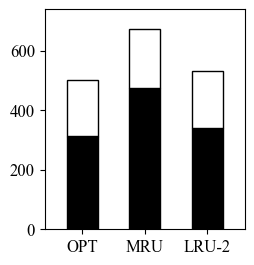

<Figure size 420x220 with 0 Axes>

In [8]:

theme = [
    ['black', ''],
    ['white', '||||'],
    ['white', '\\\\\\\\'],
    ['white', ''],
    ['white', '////'],
    ['white', 'xxxx'],
    # ['white', '++++'],
]
# label = ['MIN', 'MRU', 'LRU', 'LRU-K', ]
label = ['OPT', 'MRU', 'LRU-2', ]
stacktype = ["I/O", "List Update", "Future Log", "CPU", ]

# MIN, LRU, MRU
# Single I/O
nmf_data = np.array([
    [299190789.5 + 12411347.25, 22449.375, 18700.875 + 42696.875, 502524080 - (299190789.5 + 12411347.25 + 22449.375 + 18700.875 + 42696.875)],
    [461430613.9 + 12474492.75, 0, 18898.5 + 47549.25, 671799416.9 - (461430613.9 + 12474492.75 + 0 + 18898.5 + 47549.25)],
    # [327487909 + 21368854.38, 0, 24292.375 + 44951, 541456421.6 - (327487909 + 21368854.38 + 0 + 24292.375 + 44951)],
    [327520351.4 + 12558287.13, 24603, 22162.375 + 168002.75, 531557888.4 - (327520351.4 + 12558287.13 + 24603 + 22162.375 + 168002.75)],
]).T / 1000000
lr_data = np.array([
    [241125914.3 + 343.5, 3528.375, 11546.125 + 11369.25, 266379180.9 - (241125914.3 + 343.5 + 3528.375 + 11546.125 + 11369.25)],
    [242608320.3 + 341.375, 0, 10911.25 + 11503.75, 269049099.3 - (242608320.3 + 341.375 + 0 + 10911.25 + 11503.75)],
    # [294114981.4 + 330.125, 0, 11251.75 + 12919, 323413901.1 - (294114981.4 + 330.125 + 0 + 11251.75 + 12919)],
    [294888901 + 286.375, 5740.625, 12083 + 73172.75, 324343330.6 - (294888901 + 286.375 + 5740.625 + 12083 + 73172.75)],
]).T / 1000000

fig = plt.figure(figsize=(2, 2.2))
ax = fig.add_axes([0, 0, 1, 1])
# sb(ax, theme, label, stacktype, lr_data, "LR", ylabel="Elapsed Time (s)")
sb(ax, theme, label, stacktype, nmf_data, "NMF")
# ax.legend(bbox_to_anchor=(-0.1, 1.2, 2.4, 0.102), loc=4, ncol=4, mode="expand", fontsize=11)
plt.savefig('eval_policies_nmf.pdf', format='pdf', bbox_inches='tight')

lfig = plt.figure(figsize=(4.2, 2.2))
print(ax.get_legend_handles_labels())
plt.figlegend(*ax.get_legend_handles_labels(), loc = 'upper center', ncol=5, mode="expand", fontsize=11)
lfig.savefig('eval_policies_legend.pdf', format='pdf', bbox_inches='tight')

## Policies - I/O Volume

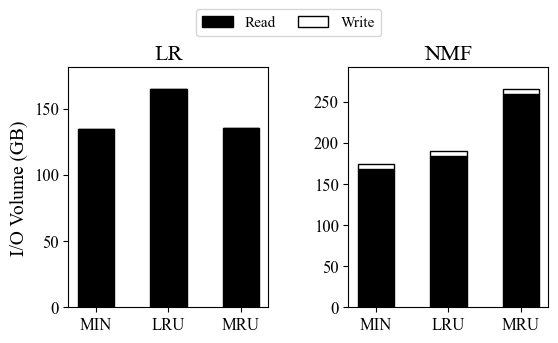

In [59]:

theme = [
    ['black', ''],
    ['white', ''],
]
label = ['MIN', 'LRU', 'MRU', ]
stacktype = ["Read", "Write", ]

# MIN, LRU, MRU
# Single I/O
nmf_data = np.array([
    [1.6768E+11, 6400008000],
    [1.8368E+11, 6400008000],
    [2.59072E+11, 6400008000]
]).T / 1000000000
lr_data = np.array([
    [1.34451E+11, 800],
    [1.64832E+11, 800],
    [1.35482E+11, 800]
]).T / 1000000000

fig = plt.figure(figsize=(2, 2.4))
ax = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.4, 0, 1, 1])

# a(ax1, theme, label, lr_data, "LR")
sb(ax, theme, label, stacktype, lr_data, "LR", ylabel="I/O Volume (GB)")
sb(ax2, theme, label, stacktype, nmf_data, "NMF")
# ax.legend()
ax.legend(bbox_to_anchor=(0.6, 1.1, 1, 0.102), loc=4, ncol=4, mode="expand", fontsize=11)

# plt.legend()
plt.savefig('page.pdf', format='pdf', bbox_inches='tight')

## exec - time

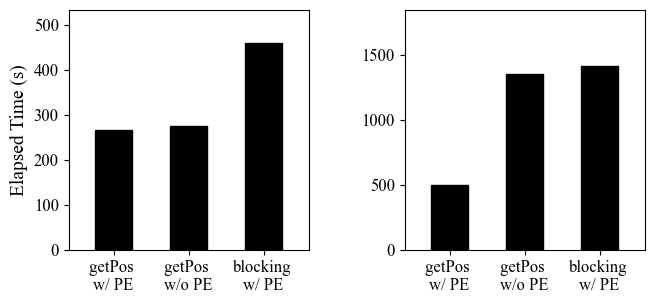

In [10]:

theme = [
    ['black', ''],
    ['white', '||||'],
    ['white', '\\\\\\\\'],
    ['white', ''],
    ['white', '////'],
    ['white', 'xxxx'],
    # ['white', '++++'],
]
label = ['getPos \nw/ PE', 'getPos \nw/o PE', 'blocking \nw/ PE', 'blocking \nw/o PE']
stacktype = ["Total"]

# MIN, LRU, MRU
# Single I/O
# nmf_data = np.array([
#     [299750021 + 12224704.88, 190593270, ],
#     [1142714162 + 500326685.9, -291828552.9, ],
#     [650650743.1 + 290847519.4, 471655987.8, ],
#     [713386259.6 + 498486757.3, 468557693.1, ],
# ]).T / 1000000
# lr_data = np.array([
#     [241461574.9 + 338.125, 25057159.5],
#     [252815708.9 + 0, 23006932.75],
#     [434129227.4 + 397.5, 25860627.13],
#     [459811479 + 0, 24539390.38],
# ]).T / 1000000

nmf_data = np.array([
    [502567996],
    [1351212295],
    [1413154250],
    [1680430710]
]).T / 1000000
lr_data = np.array([
    [266519073],
    [275822642],
    [459990252],
    [484350869]
]).T / 1000000

fig = plt.figure(figsize=(2.4, 2.4))
ax = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.4, 0, 1, 1])

# a(ax1, theme, label, lr_data, "LR")
sb(ax, theme, label, stacktype, lr_data, "LR", ylabel="Elapsed Time (s)")
sb(ax2, theme, label, stacktype, nmf_data, "NMF")
# ax.legend()
# ax.legend(bbox_to_anchor=(0.8, 1.1, 0.8, 0.102), loc=4, ncol=4, mode="expand", fontsize=11)

# plt.legend()
plt.savefig('page.pdf', format='pdf', bbox_inches='tight')

## I/O Volume

[[1.34451201e+02 1.35744001e+02 2.41920001e+02 2.41920001e+02]
 [8.00000000e-07 4.83840160e+00 8.00000000e-07 4.92800400e+00]]
0 [134.4512008 135.7440008 241.9200008 241.9200008]
1 [8.0000000e-07 4.8384016e+00 8.0000000e-07 4.9280040e+00]
0 [167.680008 167.680008 509.248008 509.248008]
1 [  6.400008  259.9680656 152.192008  259.8400816]


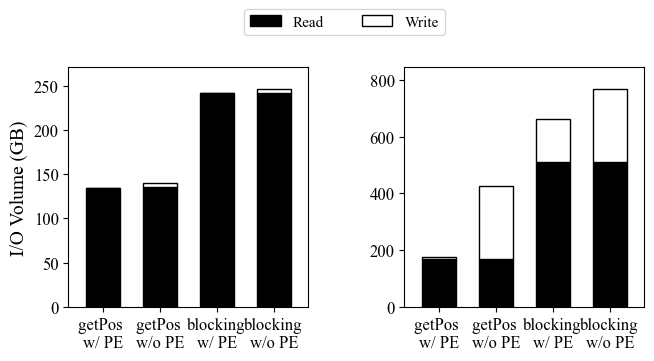

In [21]:

theme = [
    ['black', ''],
    ['white', ''],
]
label = ['getPos \nw/ PE', 'getPos \nw/o PE', 'blocking \nw/ PE', 'blocking \nw/o PE']
stacktype = ["Read", "Write", ]

# MIN, LRU, MRU
# Single I/O
nmf_data = np.array([
    [0 + 167680008000, 6400008000],
    [0 + 167680008000, 259968065600],
    [145792000000 + 363456008000, 152192008000],
    [144512000000 + 364736008000, 259840081600],
]).T / 1000000000
lr_data = np.array([
    [0 + 134451200800, 800],
    [0 + 135744000800, 4838401600],
    [0 + 241920000800, 800],
    [0 + 241920000800, 4928004000],
]).T / 1000000000

fig = plt.figure(figsize=(2.4, 2.4))
ax = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.4, 0, 1, 1])

print(lr_data)
# a(ax1, theme, label, lr_data, "LR")
sb(ax, theme, label, stacktype, lr_data, "LR", ylabel="I/O Volume (GB)")
sb(ax2, theme, label, stacktype, nmf_data, "NMF")
# ax.legend()
ax.legend(bbox_to_anchor=(0.7, 1.1, 0.9, 0.102), loc=4, ncol=4, mode="expand", fontsize=11)
plt.savefig('eval_exec.pdf', format='pdf', bbox_inches='tight')

# lfig = plt.figure(figsize=(6, 0.6))
# plt.figlegend(*ax.get_legend_handles_labels(), loc = 'upper center', ncol=5, mode="expand", fontsize=11)
# lfig.savefig('eval_sparse_overall_legend.pdf', format='pdf', bbox_inches='tight')